In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, multivariate_normal

In [73]:
mu = [[0.0, 0.0, 0.0, 0.0, 0.0]]
gauss_lambda = [np.identity(5)*0.00001]
a = [1]
b = [0.1]

def phi_function(x, mu):
    return sum([mu[n]*(x**n) for n in range(5)])
        

def gen_lambda_dist():
    i = len(a)-1
    return gamma(a[i], scale=1/b[i])

def gen_w_dist(lmd):
    i = len(mu)-1
    return multivariate_normal(mu[i], np.sqrt(np.linalg.inv(gauss_lambda[i])/lmd))

def draw(pdf, range_min, range_max, step):
    xs = np.arange(range_min, range_max, step)
    ys = [pdf.pdf(x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

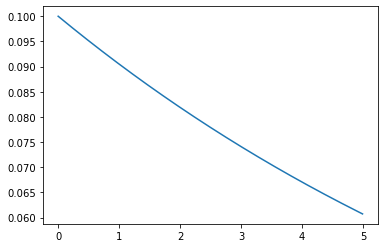

In [59]:
lambda_dist = gen_lambda_dist()
draw(lambda_dist, 0, 5, 0.01)

In [60]:
lmd = lambda_dist.rvs(1)
w_dist = gen_w_dist(lmd)

array([-12.26763339,   2.4203837 ,   6.68659467,  15.86340262,
        -3.83516421])

In [69]:
data = []
for i in range(100):
    x = (np.random.rand() - 0.5)*10
    y = x**2 + np.random.randn()
    
    data.append([x,y])

In [71]:
def draw_data(data):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    plt.show()

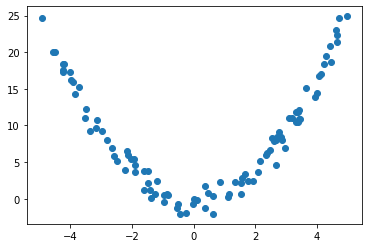

In [72]:
draw_data(data)

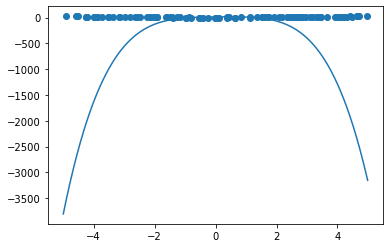

In [78]:
mu = w_dist.rvs(1)

def draw_estimate(data, mu):
    xs = np.arange(-5, 5, 0.01)
    ys = [phi_function(x, mu) for x in xs]
    plt.plot(xs, ys)
    
    draw_data(data)
    
draw_estimate(data, mu)